In [199]:
out_dir = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/notebook_07/best_maps/weighted_average_flipped_lesions/convergence_maps/agreement_inverted'

# 01 - Begin Analysis

Enter the path to the dictionary generated by Notebook 01

In [200]:
dict_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/notebook_01/redo2/conn/tmp/dataset_dict_prune.json'

In [201]:
'/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/notebook_01/tms_studies/roi/tmp/dataset_dict.json'
'/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/notebook_10/unseen_data.json'
'/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/notebook_01/ds_studies/roi/tmp/dataset_dict.json'
'/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/notebook_01/redo2/conn/tmp/dataset_dict_prune.json'

'/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/notebook_01/redo2/conn/tmp/dataset_dict_prune.json'

What correlation method would you like to use?
- Pearson is very fast, but depends on linearity and is sensitive to outliers
- Spearman is slower, but much more robust

In [202]:
correlation = 'spearman'

In [203]:
from calvin_utils.ccm_utils.npy_utils import DataLoader
from calvin_utils.ccm_utils.stat_utils import CorrelationCalculator
data_loader = DataLoader(dict_path)
correlation_calculator = CorrelationCalculator(method=correlation, verbose=False)
corr_map_dict = correlation_calculator.generate_correlation_maps(data_loader)

Evaluating ANT DBS SANTE
Evaluating STN DBS
Evaluating ANT DBS Maastricht
Evaluating Epilepsy iEEG
Evaluating Alzheimer Disease
Evaluating Acute Stroke
Evaluating Multiple Sclerosis
Evaluating Penetrating TBI
Evaluating Parietal TMS Hebscher
Evaluating Parietal TMS Wang
Evaluating Parietal TMS Hermiller 2019a
Evaluating Parietal TMS Hermiller 2019b


# 02 - Use LOOCV to Train a Convergent Map on N-1 Datasets, Then Test it on the Nth dataset

Enter a list of datasets you want to flip (multiply correlation map by -1)
- This is typically done to control for sign inversion, enabling testing of topology specifically. 

In [204]:
datasets_to_flip = [] #'fornix_memory', 'adni_Alzheimer', 'corbetta_memory', 'grafmann_memory', 'manitoba_memory', 'ms_memory', 'kim_tms', 'hebscher_tms']

In [205]:
corr_map_dict

{'ANT DBS SANTE': array([[0.09362702, 0.04802004, 0.02863507, ..., 0.01367405, 0.02461329,
         0.02762962]]),
 'STN DBS': array([[0.02906374, 0.05649605, 0.06480429, ..., 0.03646563, 0.05435101,
         0.04927543]]),
 'ANT DBS Maastricht': array([[0.21892721, 0.20495313, 0.19253173, ..., 0.09160784, 0.09937122,
         0.10558192]]),
 'Epilepsy iEEG': array([[0.26058789, 0.2639436 , 0.28176355, ..., 0.18548951, 0.21626943,
         0.19567235]]),
 'Alzheimer Disease': array([[-0.14774004, -0.13862568, -0.12975752, ..., -0.19208309,
         -0.18198996, -0.19706585]]),
 'Acute Stroke': array([[0.39948346, 0.40424404, 0.36327817, ..., 0.29323548, 0.30188732,
         0.28651271]]),
 'Multiple Sclerosis': array([[ 0.03312057,  0.03645324,  0.04030088, ...,  0.01313386,
          0.00378559, -0.00218352]]),
 'Penetrating TBI': array([[-0.07354125, -0.05761142, -0.02349312, ..., -0.07900495,
         -0.07570446, -0.06165154]]),
 'Parietal TMS Hebscher': array([[0.19796776, 0.16409

Generate the Convergent Maps and Save the Individual Correlation Maps

In [206]:
from calvin_utils.ccm_utils.convergent_loocv import LOOCVAnalyzer
loocv_analyzer = LOOCVAnalyzer(corr_map_dict, data_loader, 
                               similarity='spatial_correl',
                               method=correlation,
                               out_dir=out_dir,
                               mask_path='/Users/cu135/hires_backdrops/MNI/MNI152_T1_2mm_brain_mask.nii',
                               roi_path='/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/notebook_07/best_maps/weighted_average/all_datasets_weighted_avg_r_map.nii.gz',
                               )

Removing NaNS from self.coor_map_dict.


Run LOOCV

No training required--loading user-defined ROI file


<Figure size 432x432 with 0 Axes>

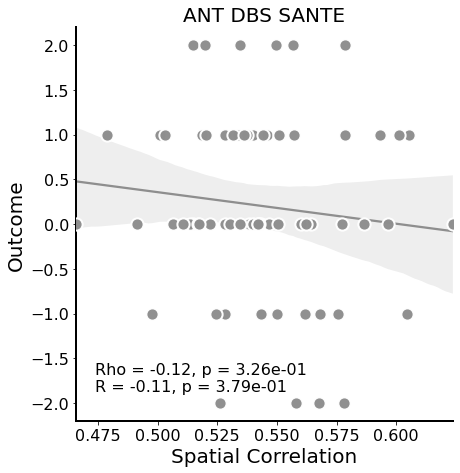

No training required--loading user-defined ROI file


<Figure size 432x432 with 0 Axes>

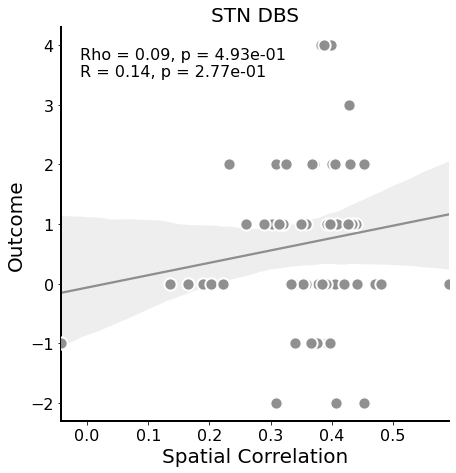

No training required--loading user-defined ROI file


<Figure size 432x432 with 0 Axes>

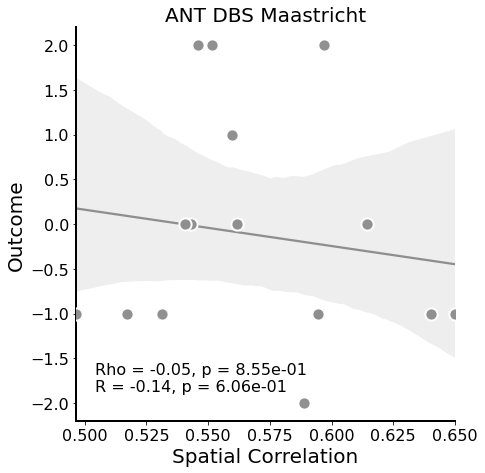

No training required--loading user-defined ROI file


<Figure size 432x432 with 0 Axes>

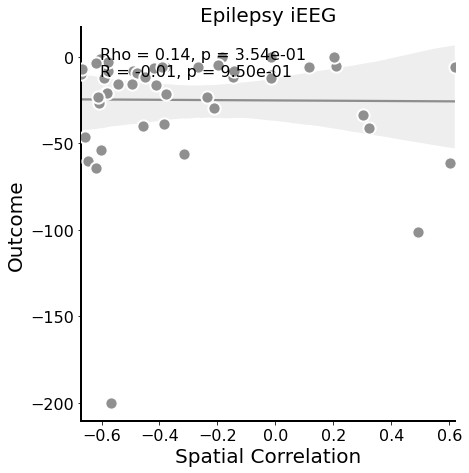

No training required--loading user-defined ROI file


<Figure size 432x432 with 0 Axes>

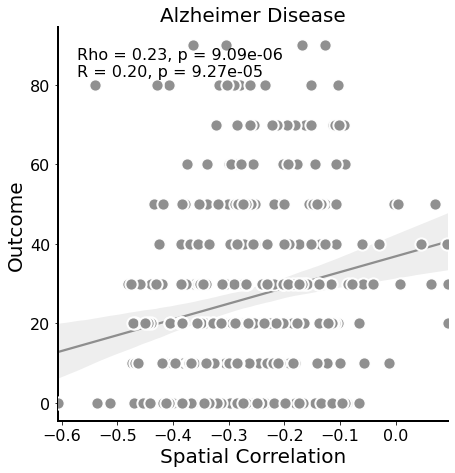

No training required--loading user-defined ROI file


<Figure size 432x432 with 0 Axes>

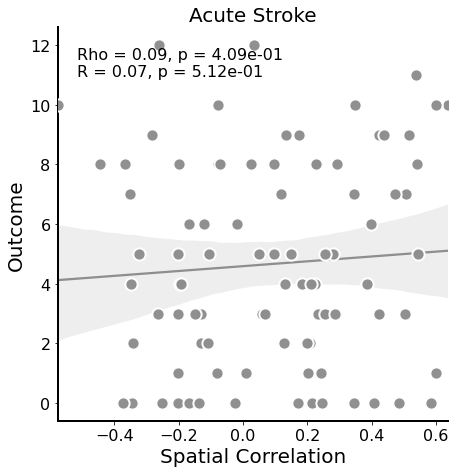

No training required--loading user-defined ROI file


<Figure size 432x432 with 0 Axes>

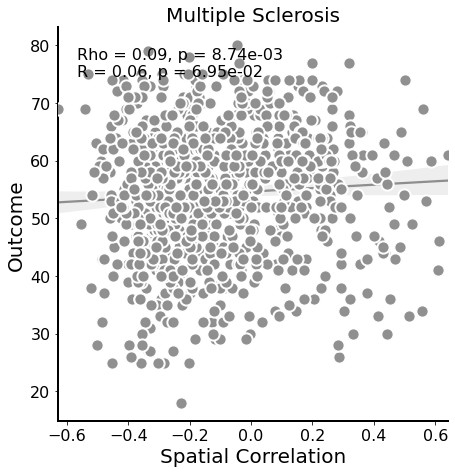

No training required--loading user-defined ROI file


<Figure size 432x432 with 0 Axes>

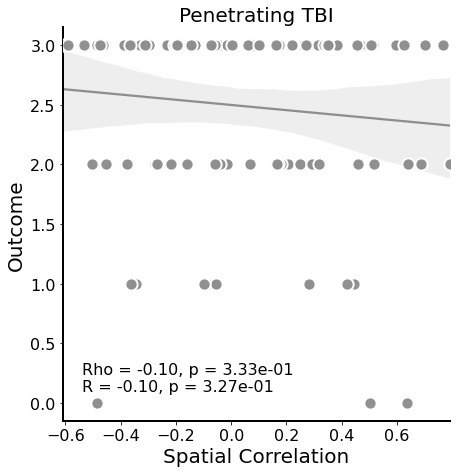

No training required--loading user-defined ROI file


<Figure size 432x432 with 0 Axes>

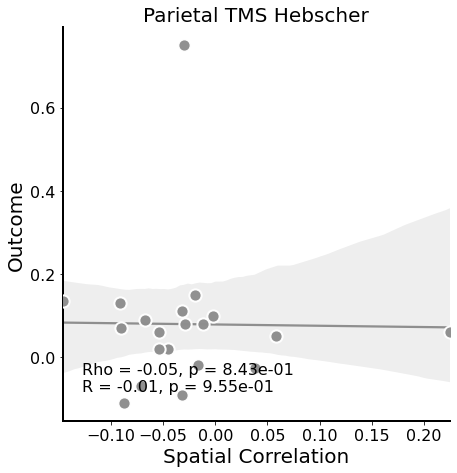

No training required--loading user-defined ROI file


<Figure size 432x432 with 0 Axes>

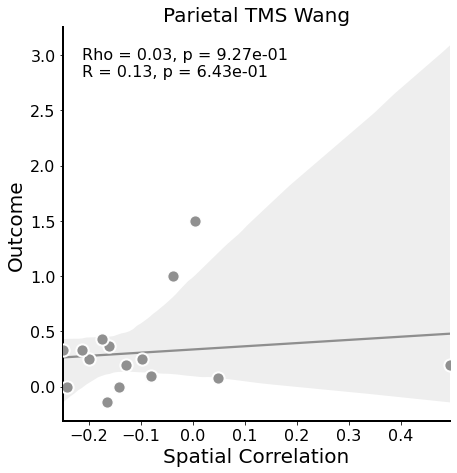

No training required--loading user-defined ROI file


<Figure size 432x432 with 0 Axes>

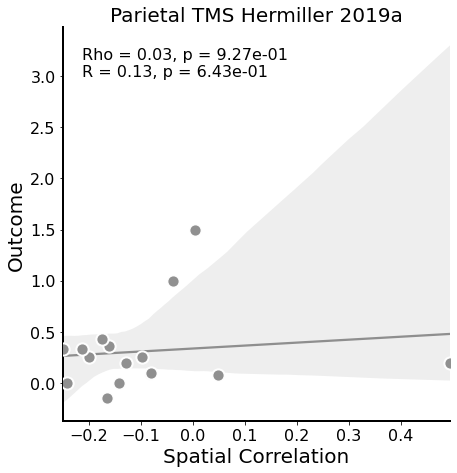

No training required--loading user-defined ROI file


<Figure size 432x432 with 0 Axes>

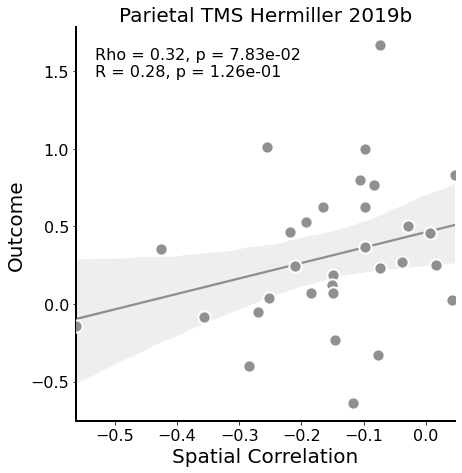

In [207]:
loocv_analyzer.run()

That's all

-Calvin